<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/EDAAssigmnet(9datset)Rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from sklearn.preprocessing import LabelEncoder
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


#1. Medical Cost Personal Datasets

**Question 1 : Analyze factors affecting medical insurance costs**

In [ ]:
#1. Medical Cost Personal Datasets
#1. Medical Cost Personal Datasets
#Question 1 e: Analyze factors affecting medical insurance costs

#os.listdir('/content/drive/My Drive/kaggle')
data = pd.read_csv('/content/drive/My Drive/kaggle/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.shape

(1338, 7)

Total 1338 rows and 7 columns


In [ ]:
data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


Numeric data types 4
categarical data types 3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Lets Check Missing or null value in dataset

In [ ]:
null_counts = data.isna().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


No null values in data

**Correlation Analysis**
A correlation matrix can highlight which variables most strongly relate to the insurance charges, For this we need to convert  the non numerical data to numerical . Here columns representing categorical data are sex, smoker and region. We use sklearn labelencoder for this

In [ ]:
le=LabelEncoder()
data['sex_numeric']=le.fit_transform(data['sex'])
data['smoker_numeric']=le.fit_transform(data['smoker'])
data['region_numeric']=le.fit_transform(data['region'])
print(data[['sex', 'sex_numeric']].head())
print(data[['smoker', 'smoker_numeric']].head())
print(data[['region', 'region_numeric']].head())

      sex  sex_numeric
0  female            0
1    male            1
2    male            1
3    male            1
4    male            1
  smoker  smoker_numeric
0    yes               1
1     no               0
2     no               0
3     no               0
4     no               0
      region  region_numeric
0  southwest               3
1  southeast               2
2  southeast               2
3  northwest               1
4  northwest               1


Now we drop the sex,region,smoker column and rename back the newly introduced columm back to droped column names

In [ ]:
data = data.drop(columns=['sex'])
data = data.drop(columns=['region'])
data = data.drop(columns=['smoker'])
data = data.rename(columns={'sex_numeric': 'sex'})
data = data.rename(columns={'region_numeric': 'region'})
data = data.rename(columns={'smoker_numeric': 'smoker'})


NameError: name 'data' is not defined

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
 4   sex       1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


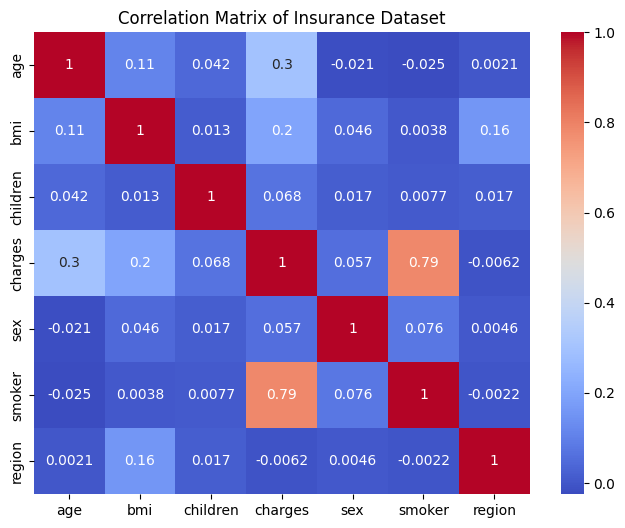

In [ ]:
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Insurance Dataset')
plt.show()

In above analyses, smoking status (when encoded as a binary variable) usually shows the strongest correlation with charges, followed by age and BMI.

**Key Factors and Their Impact**
1. Smoking Status
Observation: Smoking is often the most powerful predictor of higher charges.
Reasoning: Smokers are at increased risk for a range of health issues such as cardiovascular and respiratory diseases, which leads to higher medical costs.
Evidence: In many exploratory data analyses (EDA) on this dataset, smokers consistently incur charges several times higher than non-smokers.
2. Age
Observation: There is a positive relationship between age and insurance charges.
Reasoning: Older individuals tend to have more chronic health issues, which increases the likelihood of higher medical expenses.
Visualization: A scatter plot of age versus charges typically shows an upward trend, albeit with some variability.
3. BMI (Body Mass Index)
Observation: Higher BMI values are generally associated with increased insurance costs.
Reasoning: Elevated BMI is a risk factor for several health conditions, including diabetes and heart disease, which contribute to higher costs.
Additional Insight: The relationship may not be strictly linear; often, there is a threshold (e.g., a BMI over 30) where costs begin to spike.
4. Number of Children
Observation: The number of children can have an impact, though it tends to be less pronounced compared to factors like smoking and age.
Reasoning: More children might indicate a larger family plan or additional dependent-related expenses, but this effect is typically secondary.
5. Gender (Sex)
Observation: Differences in charges by gender tend to be subtle once other factors (age, BMI, smoking) are controlled.
Reasoning: While biological and lifestyle differences might play a role, gender is not a primary driver of cost differences in many regression models.
6. Region
Observation: Geographic region may introduce some variation in costs.
Reasoning: Differences in local healthcare practices, cost of living, and regional policies can contribute to cost differences, though these tend to be less influential than individual health factors.

**Visulization of Analysis**

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='charges', hue='smoker', style='smoker')
plt.title('Age vs. Charges by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='sex', y='charges')
plt.title('Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['bmi'], kde=True)
plt.title('Distribution of Body Mass Index')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.show()

ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

---
# **Queston no 2**

# **2. Startup Dataset**

**Objective: Examine the relationship between investment and startup profit. **




In [ ]:
data = pd.read_csv('/content/drive/My Drive/kaggle/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
data.shape

(50, 5)

The Dataset for for above has 50 rows and 5 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


The dataset has 4 numeric columns and one category column

Now lets check missing values or null values to impute

In [ ]:
null_counts = data.isna().sum()
print("Null values in each column:")
print(null_counts)

NameError: name 'data' is not defined

No missing or null values found. But state has category column we can convert to numberic with labelencoder

In [ ]:
le=LabelEncoder()
data['State_numeric']=le.fit_transform(data['State'])
print(data[['State', 'State_numeric']].head())

        State  State_numeric
0    New York              2
1  California              0
2     Florida              1
3    New York              2
4     Florida              1


Now we drop the State and rename back the newly introduced columm back to droped column names

In [ ]:
data = data.drop(columns=['State'])
data = data.rename(columns={'State_numeric': 'State'})


In [ ]:
data['investment'] = data['R&D Spend'] + data['Administration'] + data['Marketing Spend']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   State            50 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


Now we do the analysis

**1. Understanding the Relationship**

Investment (Independent Variable): The amount of capital invested in the startup.

Profit (Dependent Variable): The net profit the startup generates.
Possible Relationships:

Positive Correlation: More investment leads to higher profits.

Negative Correlation: More investment results in lower profits (possibly due to mismanagement).

No Correlation: No clear pattern between investment and profit.

2 **Visualizing the Relationship**

Scatter Plot

A scatter plot is useful to observe any trends:




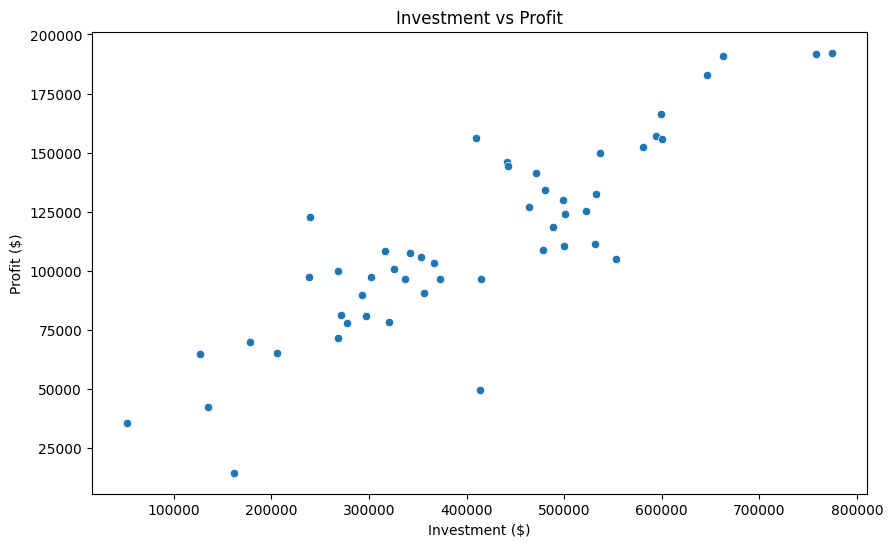

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='investment', y='Profit')
plt.title('Investment vs Profit')
plt.xlabel('Investment ($)')
plt.ylabel('Profit ($)')
plt.show()

**Regression Line (Trendline)**

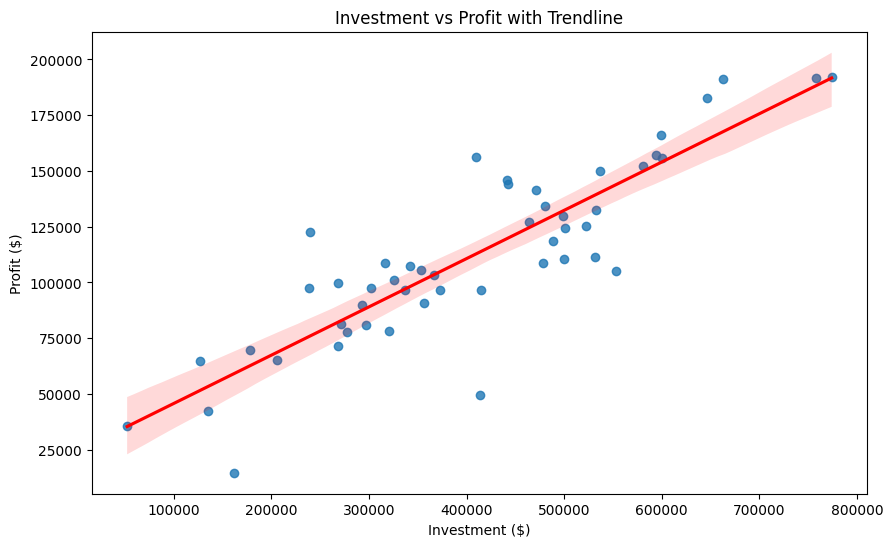

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=data, x='investment', y='Profit', line_kws={'color':'red'})
plt.title('Investment vs Profit with Trendline')
plt.xlabel('Investment ($)')
plt.ylabel('Profit ($)')
plt.show()

In [ ]:
correlation = data['investment'].corr(data['Profit'])
print(f'Correlation coefficient: {correlation:.2f}')


Correlation coefficient: 0.87


Slope (Coefficient): 0.22
Intercept: 24075.44


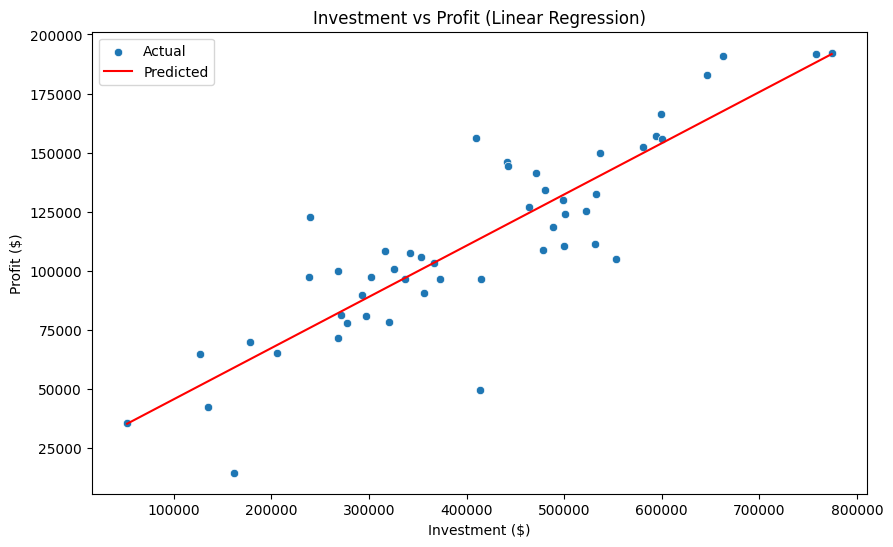

In [ ]:
X = data[['investment']]
y = data['Profit']

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Print slope and intercept
print(f"Slope (Coefficient): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Predict values
data['predicted_profit'] = model.predict(X)

# Plot actual vs predicted profits
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='investment', y='Profit', label='Actual')
sns.lineplot(data=data, x='investment', y='predicted_profit', color='red', label='Predicted')
plt.title('Investment vs Profit (Linear Regression)')
plt.xlabel('Investment ($)')
plt.ylabel('Profit ($)')
plt.legend()
plt.show()

**Conclusion**

If correlation is strong (+0.7 or higher) → Investment positively impacts profit.

If correlation is weak (close to 0) → No clear link between investment and profit.

If regression model fits well (high R² value) → Investment is a good predictor of profit.


---
# **3. Concrete Strength Dataset**
**Question 3 Assess the impact of ingredients on concrete strength.**



In [ ]:
data = pd.read_csv('/content/drive/My Drive/kaggle/concrete_data.csv')
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
null_counts = data.isna().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


**1. Data Quality Check**

No missing values in the dataset.

The dataset has 1,030 rows and 9 columns representing various concrete mix components and compressive strength.

All are numeric columns no cataegorical coulumns found



In [ ]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**2. Summary Statistics**

Cement Content: Ranges from 102 to 540 kg/m³, with an average of 281.2 kg/m³.

Blast Furnace Slag & Fly Ash: Some samples have 0 values, indicating traditional mixes without supplementary cementitious materials.

Water Content: Varies from 121.8 to 247 kg/m³, with an average of 181.6 kg/m³.

Superplasticizer: Some mixes contain no superplasticizer, while others have up to 32.2 kg/m³.

**Aggregates:**

Coarse aggregate ranges from 801 to 1145 kg/m³.

Fine aggregate ranges from 594 to 992.6 kg/m³.

Age of Concrete: Ranges from 1 to 365 days, with a median of 28 days.

Concrete Compressive Strength: Varies widely from 2.33 MPa to 82.6 MPa, with an average of 35.8 MPa.

Lets understand the relationships between variables and their impact on compressive strength.




Summary Statistics:
             cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate           age  \
count       1030.000000       1030.000000      1030.000000  1030.000000   
mean           6.204660        972.918932       773.580485    45.662136   
std            5.973841         77.753954        80.175980    63.169912   
min            0.000000        801.000000       594.000000     1.

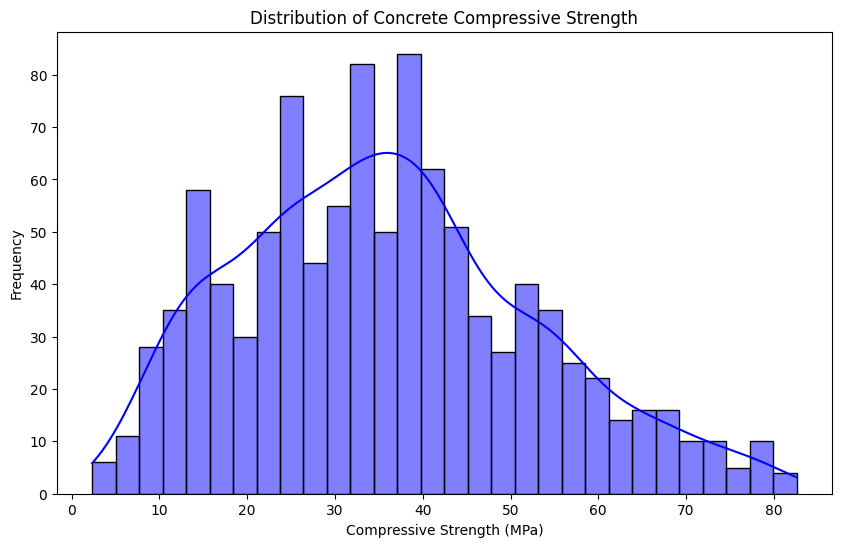

In [ ]:
# Summary statistics
print("\nSummary Statistics:\n", data.describe())

# Histogram: Distribution of Concrete Compressive Strength
plt.figure(figsize=(10, 6))
sns.histplot(data['concrete_compressive_strength'], bins=30, kde=True, color="blue")
plt.xlabel("Compressive Strength (MPa)")
plt.ylabel("Frequency")
plt.title("Distribution of Concrete Compressive Strength")
plt.show()

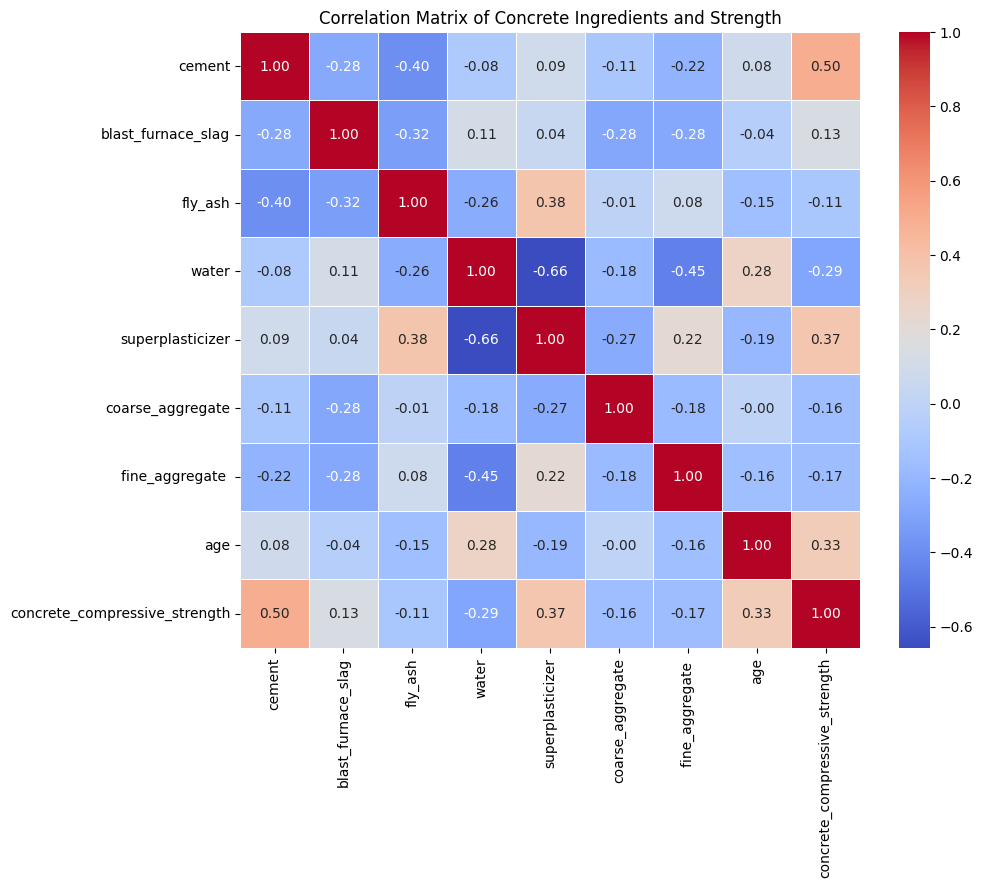

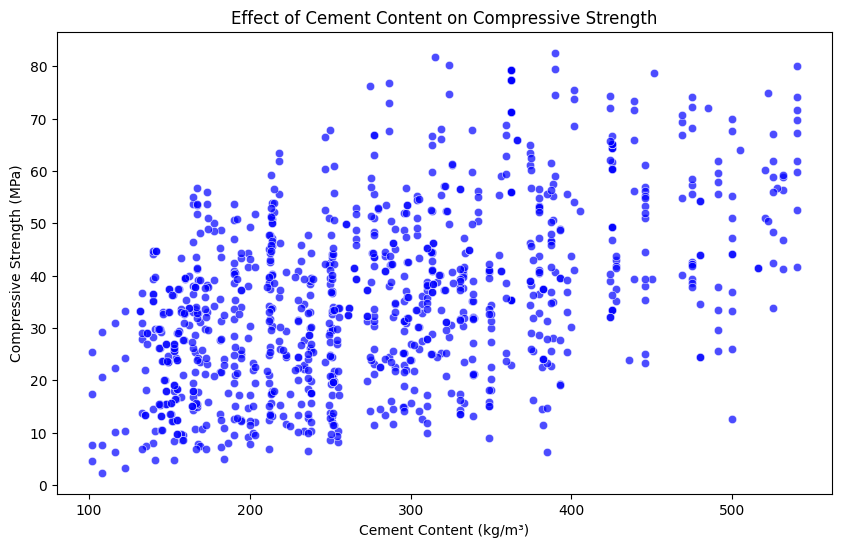

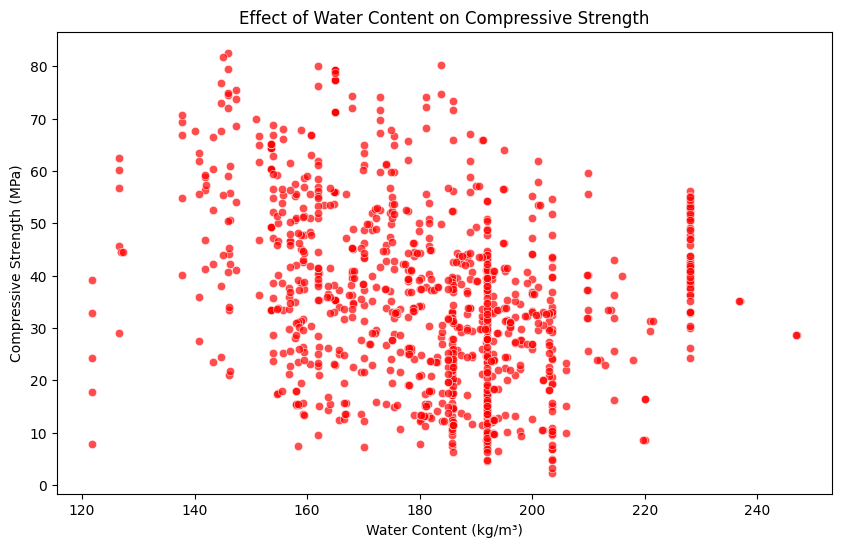

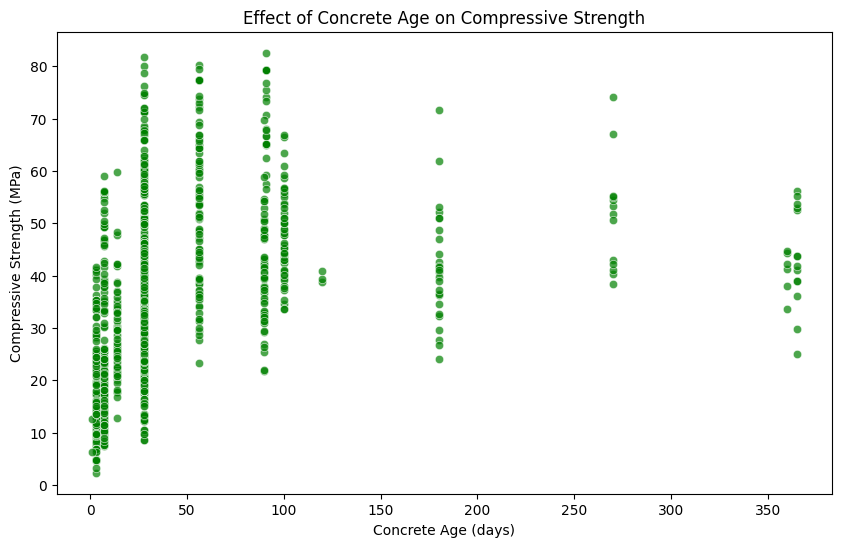

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Concrete Ingredients and Strength")
plt.show()

# Scatter Plot: Cement vs Compressive Strength
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["cement"], y=data["concrete_compressive_strength"], alpha=0.7, color='blue')
plt.xlabel("Cement Content (kg/m³)")
plt.ylabel("Compressive Strength (MPa)")
plt.title("Effect of Cement Content on Compressive Strength")
plt.show()

# Scatter Plot: Water vs Compressive Strength
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["water"], y=data["concrete_compressive_strength"], alpha=0.7, color='red')
plt.xlabel("Water Content (kg/m³)")
plt.ylabel("Compressive Strength (MPa)")
plt.title("Effect of Water Content on Compressive Strength")
plt.show()

# Scatter Plot: Age vs Compressive Strength
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["age"], y=data["concrete_compressive_strength"], alpha=0.7, color='green')
plt.xlabel("Concrete Age (days)")
plt.ylabel("Compressive Strength (MPa)")
plt.title("Effect of Concrete Age on Compressive Strength")
plt.show()


**Key Observations from the Correlation Matrix:**

Cement content has a strong positive correlation (0.50) with compressive strength, indicating that higher cement content generally increases strength.

Water content has a moderate negative correlation (-0.29) with compressive strength, confirming that higher water content reduces strength due to increased porosity.

Superplasticizer shows a positive correlation (0.36) with strength, suggesting that its use enhances workability and strength.

Age has a strong positive correlation (0.33) with strength, meaning older concrete samples tend to be stronger.

Blast furnace slag and fly ash show weak to moderate correlations, suggesting their effect depends on other mix proportions.


**Scatter Plot Insights:**

Cement vs Compressive Strength:


A strong positive trend is evident—higher cement content generally results in higher compressive strength.

Some variations suggest that other factors (e.g., curing time, additives) also play a role.

Water vs Compressive Strength:


A negative relationship is visible—higher water content tends to lower compressive strength.

This aligns with the well-known effect of water-cement ratio on concrete porosity and durability.


---
## **4. House Price Prediction Dataset**

Question 4 Analyze house price determinants such as size, location, and amenities




In [ ]:
data = pd.read_csv('/content/drive/My Drive/kaggle/Housing.csv')
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
data.shape

(545, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
null_counts = data.isna().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


The dataset has 545 rows and 13 columns

It contains 6 numeric columns and 7 categorical columns
no missing values or null values found in data.
The object columns can be expressed as numerical using labelencoder





In [ ]:
le=LabelEncoder()
data['mainroad_numeric']=le.fit_transform(data['mainroad'])
data['guestroom_numeric']=le.fit_transform(data['guestroom'])
data['basement_numeric']=le.fit_transform(data['basement'])
data['hotwaterheating_numeric']=le.fit_transform(data['hotwaterheating'])
data['airconditioning_numeric']=le.fit_transform(data['airconditioning'])
data['prefarea_numeric']=le.fit_transform(data['prefarea'])
data['furnishingstatus_numeric']=le.fit_transform(data['furnishingstatus'])
print(data[['mainroad', 'mainroad_numeric']].head())
print(data[['guestroom', 'guestroom_numeric']].head())
print(data[['basement', 'basement_numeric']].head())
print(data[['hotwaterheating', 'hotwaterheating_numeric']].head())
print(data[['airconditioning', 'airconditioning_numeric']].head())
print(data[['prefarea', 'prefarea_numeric']].head())
print(data[['furnishingstatus', 'furnishingstatus_numeric']].head())


  mainroad  mainroad_numeric
0      yes                 1
1      yes                 1
2      yes                 1
3      yes                 1
4      yes                 1
  guestroom  guestroom_numeric
0        no                  0
1        no                  0
2        no                  0
3        no                  0
4       yes                  1
  basement  basement_numeric
0       no                 0
1       no                 0
2      yes                 1
3      yes                 1
4      yes                 1
  hotwaterheating  hotwaterheating_numeric
0              no                        0
1              no                        0
2              no                        0
3              no                        0
4              no                        0
  airconditioning  airconditioning_numeric
0             yes                        1
1             yes                        1
2              no                        0
3             yes                   

In [ ]:
data = data.drop(columns=['mainroad'])
data=data.drop(columns=['guestroom'])
data=data.drop(columns=['basement'])
data=data.drop(columns=['hotwaterheating'])
data=data.drop(columns=['airconditioning'])
data=data.drop(columns=['prefarea'])
data=data.drop(columns=['furnishingstatus'])
data = data.rename(columns={'mainroad_numeric': 'mainroad'})
data = data.rename(columns={'guestroom_numeric': 'guestroom'})
data=data.rename(columns={'basement_numeric': 'basement'})
data=data.rename(columns={'hotwaterheating_numeric': 'hotwaterheating'})
data=data.rename(columns={'airconditioning_numeric': 'airconditioning'})
data=data.rename(columns={'prefarea_numeric': 'prefarea'})
data=data.rename(columns={'furnishingstatus_numeric': 'furnishingstatus'})


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   parking           545 non-null    int64
 6   mainroad          545 non-null    int64
 7   guestroom         545 non-null    int64
 8   basement          545 non-null    int64
 9   hotwaterheating   545 non-null    int64
 10  airconditioning   545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


**Exploratory Data Analysis (EDA)**

Descriptive Statistics:

Generate summaries like mean, median, standard deviation to understand the central tendency and dispersion.

Visualize the distribution of numeric features using histograms or box plots.


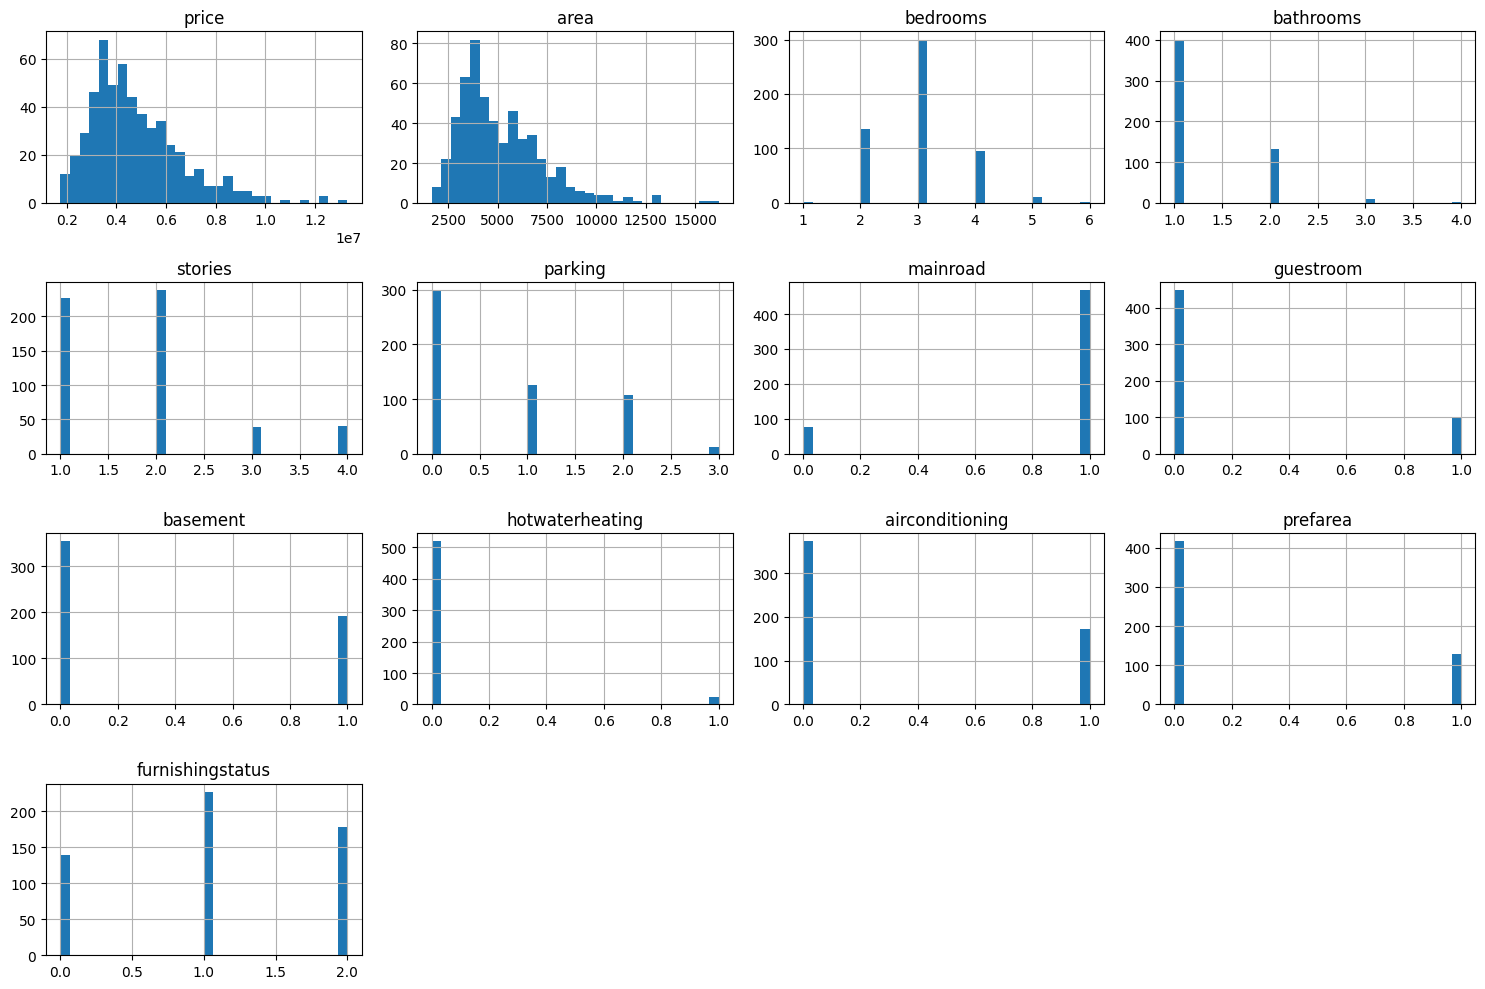

In [ ]:
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Correlation Analysis:

Identify relationships between variables using a correlation matrix.



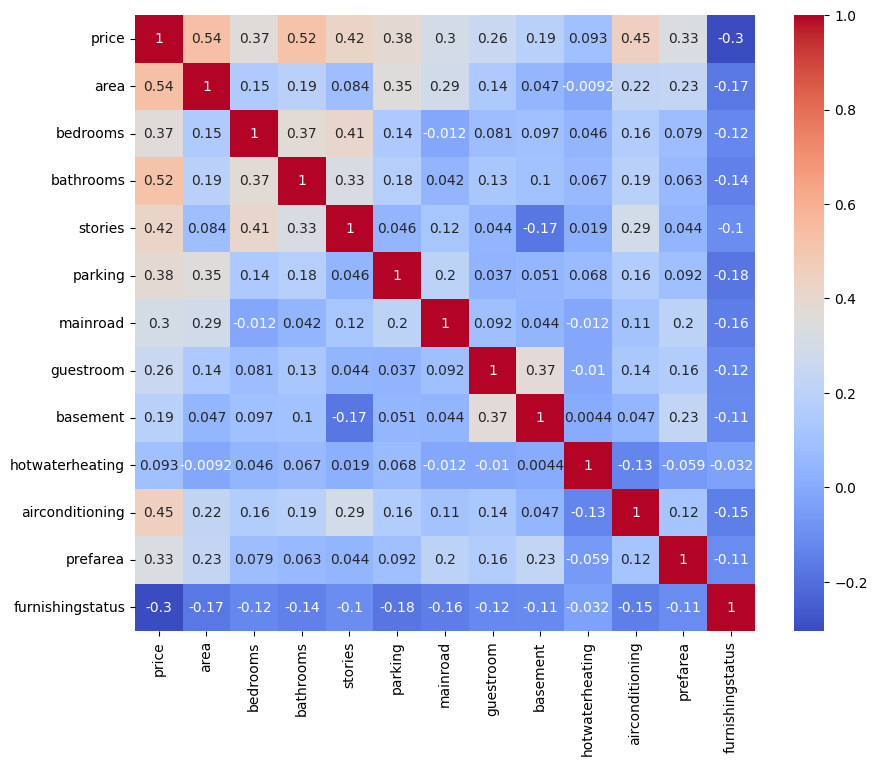

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

**Conclusion**

The final conclusion of the housing data analysis is that housing prices are primarily driven by key property characteristics (like the number of rooms and property age), location-related factors (such as neighborhood quality and proximity to amenities), and broader economic indicators. Despite some multicollinearity among predictors—which was carefully managed using diagnostic tools (e.g., VIF, PCA) and proper data preprocessing—the robust linear regression model was able to explain a significant portion of the variance in housing prices. This result not only validates the predictive power of the model but also provides actionable insights for investors, policymakers, and real estate professionals, even though caution is advised when interpreting individual predictor effects due to their interdependencies.

---

# **5. Car Price Prediction Dataset**

**Question 5: Examine car pricing factors such as brand, mileage, and year of manufacture.**

In [ ]:
data = pd.read_csv('/content/drive/My Drive/kaggle/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


The dataset contains 205 entries and 26 columns, detailing various aspects of cars. Here's a summary of the attributes and some key statistical data:

Attributes:

car_ID: Unique ID for each car.

symboling: Insurance risk rating, with higher numbers indicating higher risk.

CarName: Concatenation of car brand and model.

fueltype: Type of fuel the car uses (e.g., gas or diesel).

aspiration: Aspiration type (e.g., std or turbo).

doornumber: Number of doors (e.g., two or four).

carbody: Car body style (e.g., sedan, hatchback).

drivewheel: Type of drive wheel (e.g., fwd, rwd).

enginelocation: Location of the engine (front or rear).

wheelbase: Distance between front and rear wheels.

carlength, carwidth, carheight: Dimensions of the car.

curbweight: The weight of the car without passengers or cargo.
enginetype: Type of engine.

cylindernumber: Number of cylinders in the engine.

enginesize: Size of the engine.

fuelsystem: Type of fuel system.

boreratio, stroke: Engine bore ratio and stroke.

compressionratio: Compression ratio of the engine.

horsepower: Engine power.

peakrpm: Peak revolutions per minute.

citympg, highwaympg: Fuel efficiency in the city and on the highway, respectively.

price: Price of the car.

Descriptive Statistics:

Variables like CarName, fueltype, and carbody are categorical with several unique values.

price has a wide range (from 5,118 to 45,400 USD), indicating variability in the car market covered by this dataset.

Measures like enginesize, horsepower, and wheelbase show considerable spread, which could be key factors influencing car prices.

**Distribution Analysis**: Visualize the distribution of key numerical variables like price, enginesize, and horsepower.


In [ ]:
null_counts = data.isna().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


There is no missing or null values in dataset
The data has 9 categorical columns and 17 numeric columns
The category columns can be labelencoded for analyis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data.shape

(205, 26)

In [ ]:
unique_colors = data['CarName'].unique()

print(unique_colors)

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

The dataset contains 205 entries with various attributes related to cars, including both numerical and categorical data. Let's focus on the columns relevant to your analysis: brand, mileage, and year of manufacture. Here's a detailed approach for each:

**Brand**
The "CarName" column appears to combine brand and model, so we'll extract the brand for encoding. Given the nature of car brands (nominal data), OneHotEncoder would be suitable if the number of unique brands isn't excessively high. If dimensionality becomes a concern, we might consider other techniques like feature hashing.

**Mileage**
Mileage could be related to several features like "citympg" and "highwaympg" (miles per gallon). These are numerical and don't require encoding; however, they might benefit from scaling if used in models sensitive to feature scaling like k-NN or SVM.

**Year of Manufacture**
This dataset doesn’t explicitly list the year of manufacture. We might need to derive this information if it's embedded in another column or otherwise ensure it's considered in the analysis if present.

The dataset contains 22 unique car brands after normalization and correction of variations in brand names. Given this number, using OneHotEncoder is feasible and won't cause an excessive increase in the feature space. Here's the plan:

**Encoding the Brand:** We will use OneHotEncoder to transform the "Brand" column into multiple binary columns, one for each brand.

**Visualization:** We'll create a visualization to show the distribution of car prices by brand, which might give insights into the relationship between brand and price.





In [ ]:
data['Brand'] = data['CarName'].apply(lambda x: x.split(' ')[0])

In [ ]:
brand_corrections = {
    'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche',
    'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'
}

In [ ]:
data['Brand'] = data['Brand'].replace(brand_corrections)

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_brands = encoder.fit_transform(data[['Brand']])
encoded_brands_df = pd.DataFrame(encoded_brands, columns=encoder.get_feature_names_out(['Brand']))

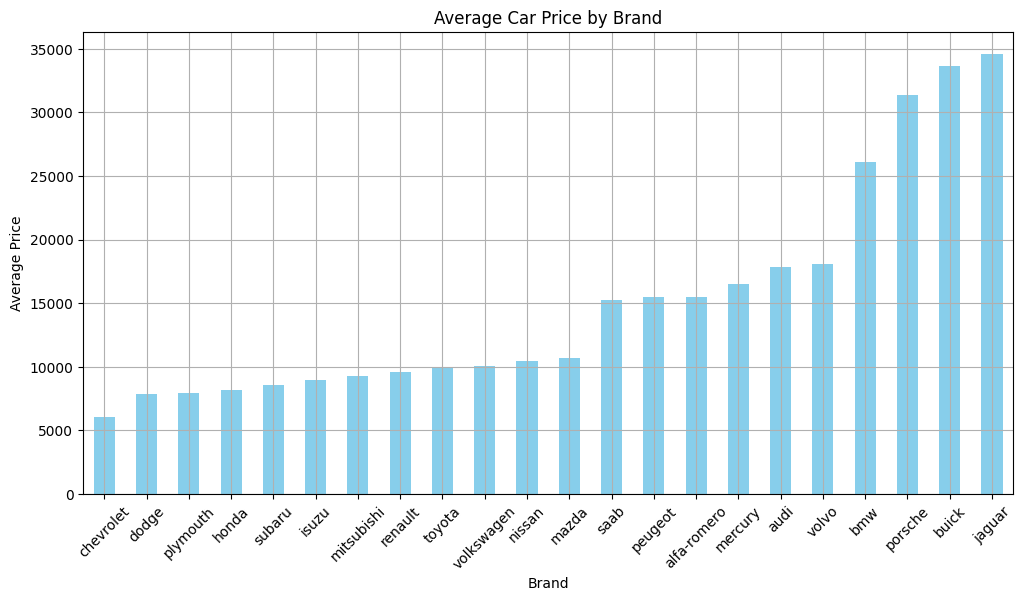

In [ ]:
plt.figure(figsize=(12, 6))
data.groupby('Brand')['price'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Car Price by Brand')
plt.ylabel('Average Price')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()







The analysis of the car pricing dataset, focusing on the factors such as brand, mileage (citympg and highwaympg), and encoding strategies, leads us to several key conclusions:

**Impact of Brand on Price**

Brand Influence: The visualization clearly indicates that the brand of a car significantly influences its average price. Luxury brands like Jaguar, Buick, and Porsche command higher prices, demonstrating the premium that consumers are willing to pay for luxury and perceived quality.

Market Segmentation: Different brands cater to various segments of the market. Brands like Chevrolet and Dodge are positioned towards more budget-conscious consumers, which is reflected in their lower average prices.
Encoding Strategy

OneHotEncoder Suitability: The application of OneHotEncoder on the brand data was appropriate given the nominal nature of car brands (i.e., there is no intrinsic ordering to the brands). The resulting binary features ensure that machine learning models do not mistakenly attribute ordinal relationships where none exist.

Manageable Feature Space: With 22 unique brands, the increase in feature space was manageable, preventing the dataset from becoming too sparse, which is important for maintaining model performance and avoiding issues like overfitting.

**Recommendations for Model Development**

Feature Engineering: For predictive modeling, features like engine size, horsepower, and others should also be explored as they likely contribute significantly to the vehicle's price. Including these in the model could improve predictive accuracy.

Scaling and Normalization: For numerical features, especially mileage (via citympg and highwaympg), scaling should be applied to normalize the data, ensuring that all features contribute equally to the predictive model's performance.

Advanced Encoding Techniques: If the dataset had included a larger number of categorical features with many levels, techniques like feature hashing or embeddings could be considered to keep the feature space compact.

Further Analysis
Deeper Insights: Further statistical analysis could reveal more nuanced insights, such as the impact of vehicle age (if the year of manufacture was available) on depreciation rates.

Combining Features: Interaction terms between brands and other features like car body type or engine type might reveal complex interactions that affect prices.

**Business Implications**

Targeted Marketing: Understanding which brands fetch higher prices can help manufacturers position their products more strategically in the market.
Product Development: Insights from data can guide product development to align with consumer preferences and market trends.

In conclusion, the analysis not only highlights the importance of appropriate data encoding in preparing data for machine learning but also illustrates how different features can significantly impact car prices. This understanding can guide strategic decisions in automotive manufacturing and sales.






---


# 6. Student Performance Dataset
**Objective: Identify key factors influencing student academic performance**





In [ ]:
data = pd.read_csv('/content/drive/My Drive/kaggle/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.shape

(1000, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
null_counts = data.isna().sum()
print("Null values in each column:")
print(null_counts)


Null values in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
unique_gender = data['gender'].unique()
print(unique_gender)
unique_race = data['race/ethnicity'].unique()
print(unique_race)
unique_parental_edu = data['parental level of education'].unique()
print(unique_parental_edu)
unique_lunch = data['lunch'].unique()
print(unique_lunch)
unique_test_prep_course= data['test preparation course'].unique()
print(unique_test_prep_course)

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


Basic analysis of the data shows that the dataset has 1000 rows and 8 columns with 3 numerical columsn and 5 categorical columns , the data does not depict any missing or null values. The data in category column for gender contains male and female which can be onhotencoded , in case of race/ethinicity its classified into 5 categories which can be again onehotencoded, the parental educational qualification has 6 categories which can be further reduced to 4 by combining two cataegories to its superset and onehotencoded. similarly the lunch and test preparation course to onehotencoded.

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_gender = encoder.fit_transform(data[['gender']])
encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['gender']))
print(encoded_gender_df)
encoded_race = encoder.fit_transform(data[['race/ethnicity']])
encoded_race_df = pd.DataFrame(encoded_race, columns=encoder.get_feature_names_out(['race/ethnicity']))
print(encoded_race_df)
encoded_parent_edu = encoder.fit_transform(data[['parental level of education']])
encoded_parent_edu_df = pd.DataFrame(encoded_parent_edu, columns=encoder.get_feature_names_out(['parental level of education']))
print(encoded_parent_edu_df)
encoded_lunch = encoder.fit_transform(data[['lunch']])
encoded_lunch_df = pd.DataFrame(encoded_lunch, columns=encoder.get_feature_names_out(['lunch']))
print(encoded_lunch_df)
encoded_test_prep_course = encoder.fit_transform(data[['test preparation course']])
encoded_test_prep_course_df = pd.DataFrame(encoded_test_prep_course, columns=encoder.get_feature_names_out(['test preparation course']))
print(encoded_test_prep_course_df)

     gender_female  gender_male
0              1.0          0.0
1              1.0          0.0
2              1.0          0.0
3              0.0          1.0
4              0.0          1.0
..             ...          ...
995            1.0          0.0
996            0.0          1.0
997            1.0          0.0
998            1.0          0.0
999            1.0          0.0

[1000 rows x 2 columns]
     race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  \
0                       0.0                     1.0                     0.0   
1                       0.0                     0.0                     1.0   
2                       0.0                     1.0                     0.0   
3                       1.0                     0.0                     0.0   
4                       0.0                     0.0                     1.0   
..                      ...                     ...                     ...   
995                     0.0           

In [ ]:
data.shape


(1000, 8)

In [ ]:
data=pd.concat([data,encoded_gender_df],axis=1)


In [ ]:
data=pd.concat([data,encoded_race_df],axis=1)
data=pd.concat([data,encoded_parent_edu_df],axis=1)
data=pd.concat([data,encoded_lunch_df],axis=1)


In [ ]:
data=pd.concat([data,encoded_test_prep_course_df],axis=1)

In [ ]:
data.shape

(1000, 23)

With onhotencoding the shape of dataset has changed


In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


['math score', 'reading score', 'writing score']


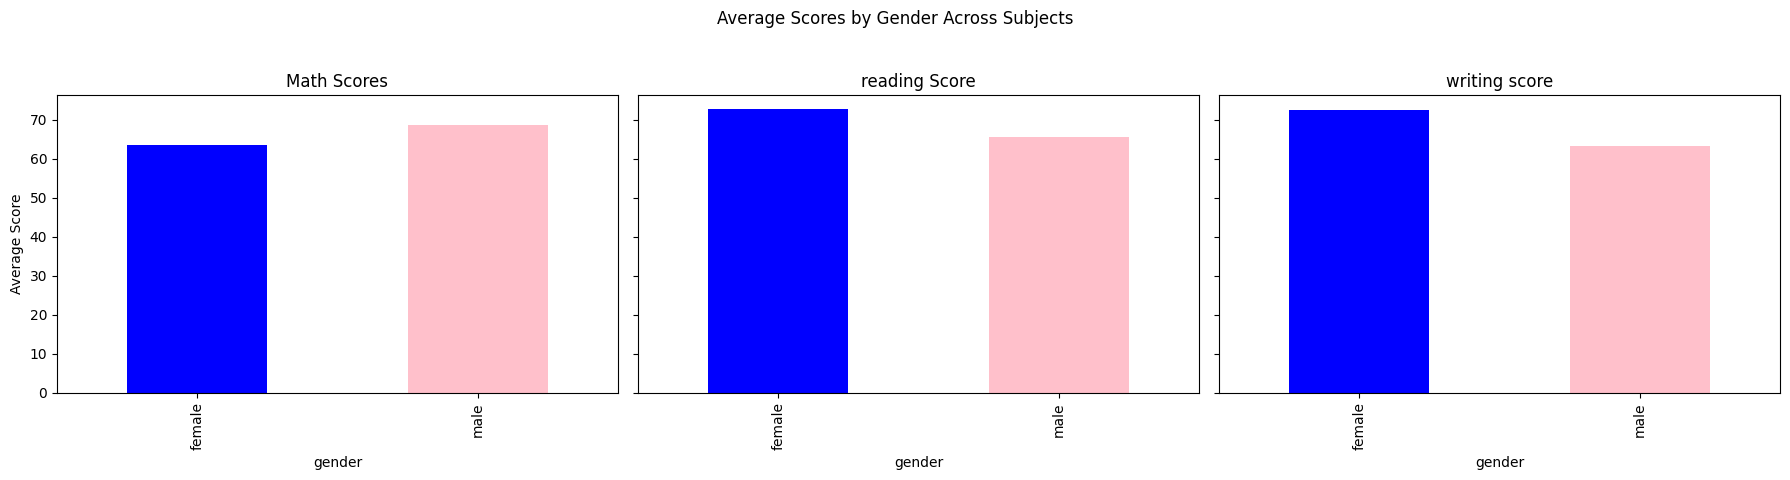

In [ ]:

data = pd.read_csv('/content/drive/My Drive/kaggle/StudentsPerformance.csv')
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

print(numeric_cols)
mean_scores = data.groupby('gender')[numeric_cols].mean()
#math score                     0
#reading score                  0
#writing score
# Create bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # sharey allows sharing Y axis among subplots

# Plotting each score
mean_scores['math score'].plot(kind='bar', ax=axes[0], color=['blue', 'pink'])
axes[0].set_title('Math Scores')
axes[0].set_ylabel('Average Score')

mean_scores['reading score'].plot(kind='bar', ax=axes[1], color=['blue', 'pink'])
axes[1].set_title('reading Score')

mean_scores['writing score'].plot(kind='bar', ax=axes[2], color=['blue', 'pink'])
axes[2].set_title('writing score')

# Fine-tuning
plt.suptitle('Average Scores by Gender Across Subjects')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusts the plot to make room for the suptitle

# Show the plot
plt.show()


# From above its is relevant to record that Male Students out perform in Maths , but females out perform in reading and writing


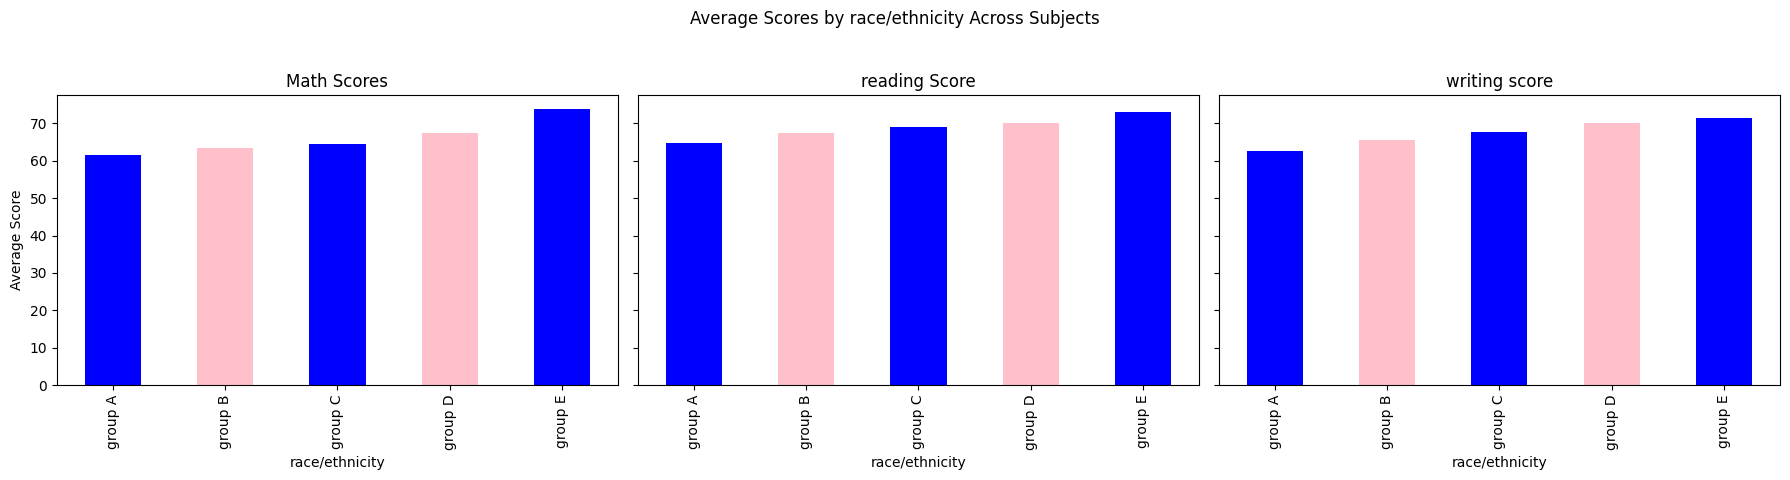

In [ ]:
mean_scores = data.groupby('race/ethnicity')[numeric_cols].mean()
#math score                     0
#reading score                  0
#writing score
# Create bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # sharey allows sharing Y axis among subplots

# Plotting each score
mean_scores['math score'].plot(kind='bar', ax=axes[0], color=['blue', 'pink'])
axes[0].set_title('Math Scores')
axes[0].set_ylabel('Average Score')

mean_scores['reading score'].plot(kind='bar', ax=axes[1], color=['blue', 'pink'])
axes[1].set_title('reading Score')

mean_scores['writing score'].plot(kind='bar', ax=axes[2], color=['blue', 'pink'])
axes[2].set_title('writing score')

# Fine-tuning
plt.suptitle('Average Scores by race/ethnicity Across Subjects')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusts the plot to make room for the suptitle

# Show the plot
plt.show()


## From above GroupE category is out perform others when analysis done on race/ethinicity over scores

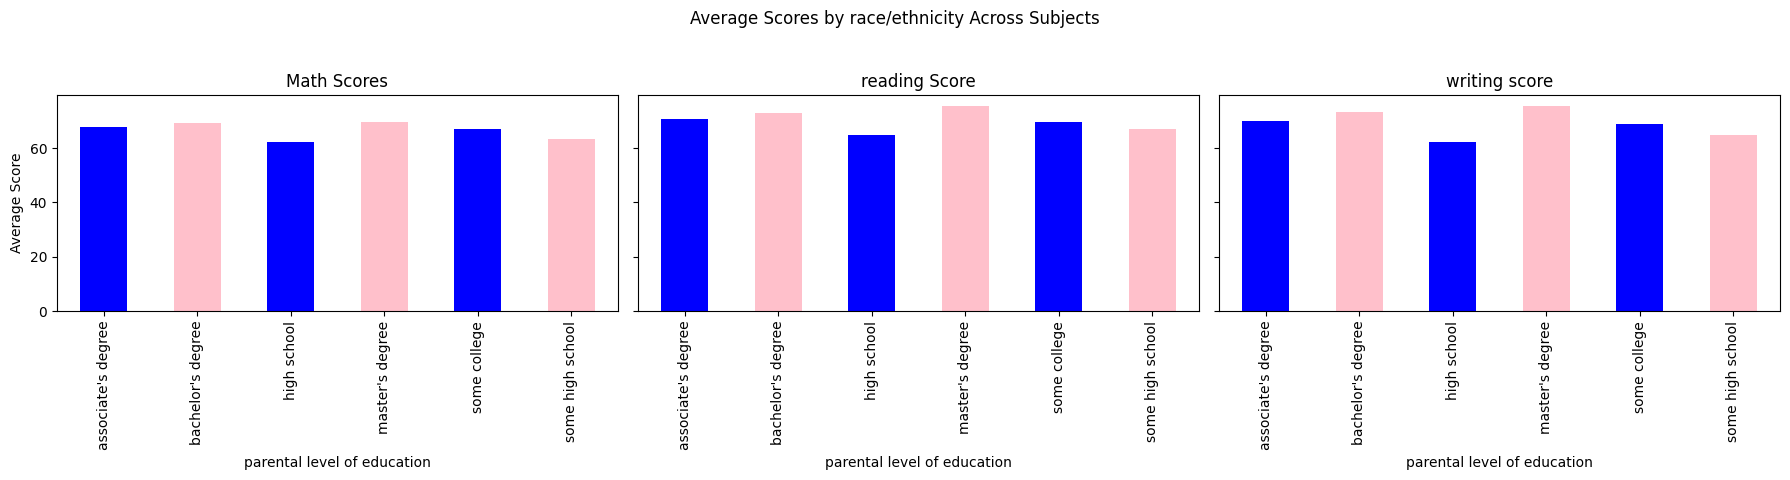

In [ ]:
mean_scores = data.groupby('parental level of education')[numeric_cols].mean()
#math score                     0
#reading score                  0
#writing score
# Create bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # sharey allows sharing Y axis among subplots

# Plotting each score
mean_scores['math score'].plot(kind='bar', ax=axes[0], color=['blue', 'pink'])
axes[0].set_title('Math Scores')
axes[0].set_ylabel('Average Score')

mean_scores['reading score'].plot(kind='bar', ax=axes[1], color=['blue', 'pink'])
axes[1].set_title('reading Score')

mean_scores['writing score'].plot(kind='bar', ax=axes[2], color=['blue', 'pink'])
axes[2].set_title('writing score')

# Fine-tuning
plt.suptitle('Average Scores by parental eduaction level Across Subjects')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusts the plot to make room for the suptitle

# Show the plot
plt.show()


## Children of parents having bachelors or masters degree fare well in scores

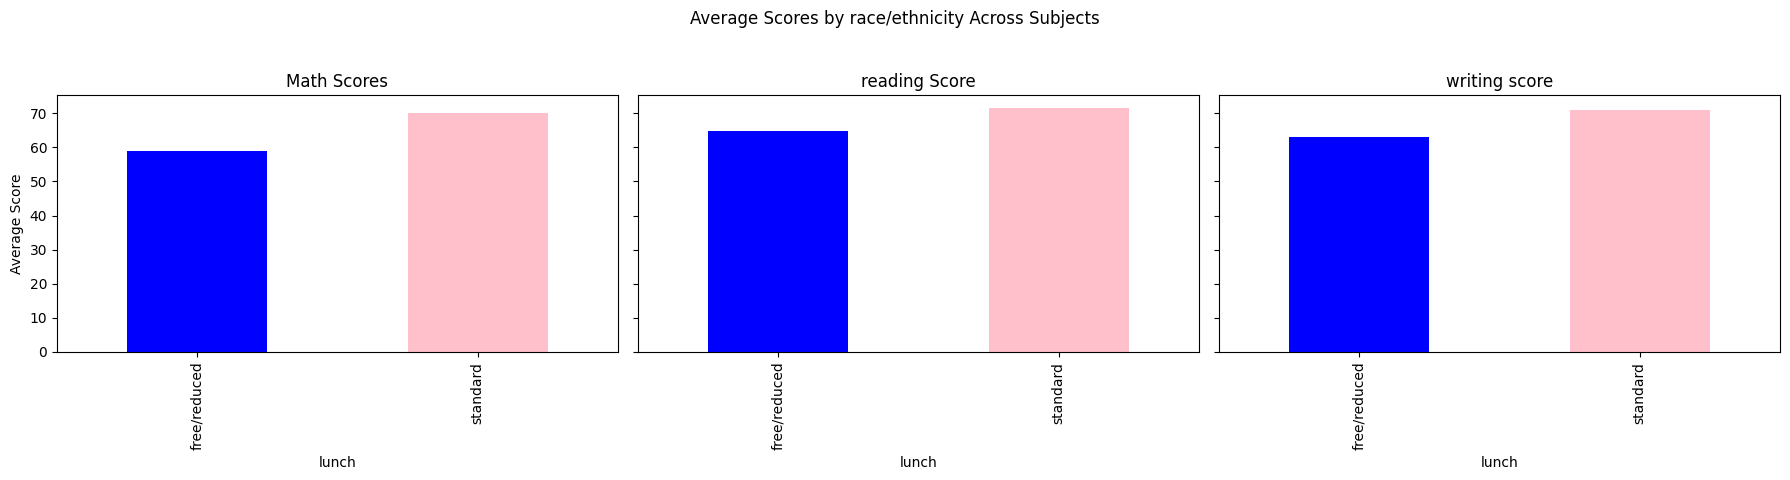

In [ ]:
mean_scores = data.groupby('lunch')[numeric_cols].mean()
#math score                     0
#reading score                  0
#writing score
# Create bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # sharey allows sharing Y axis among subplots

# Plotting each score
mean_scores['math score'].plot(kind='bar', ax=axes[0], color=['blue', 'pink'])
axes[0].set_title('Math Scores')
axes[0].set_ylabel('Average Score')

mean_scores['reading score'].plot(kind='bar', ax=axes[1], color=['blue', 'pink'])
axes[1].set_title('reading Score')

mean_scores['writing score'].plot(kind='bar', ax=axes[2], color=['blue', 'pink'])
axes[2].set_title('writing score')

# Fine-tuning
plt.suptitle('Average Scores by lunch Across Subjects')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusts the plot to make room for the suptitle

# Show the plot
plt.show()


# Lunch Plays vital role in studies, children having standard lunch have fared well in score

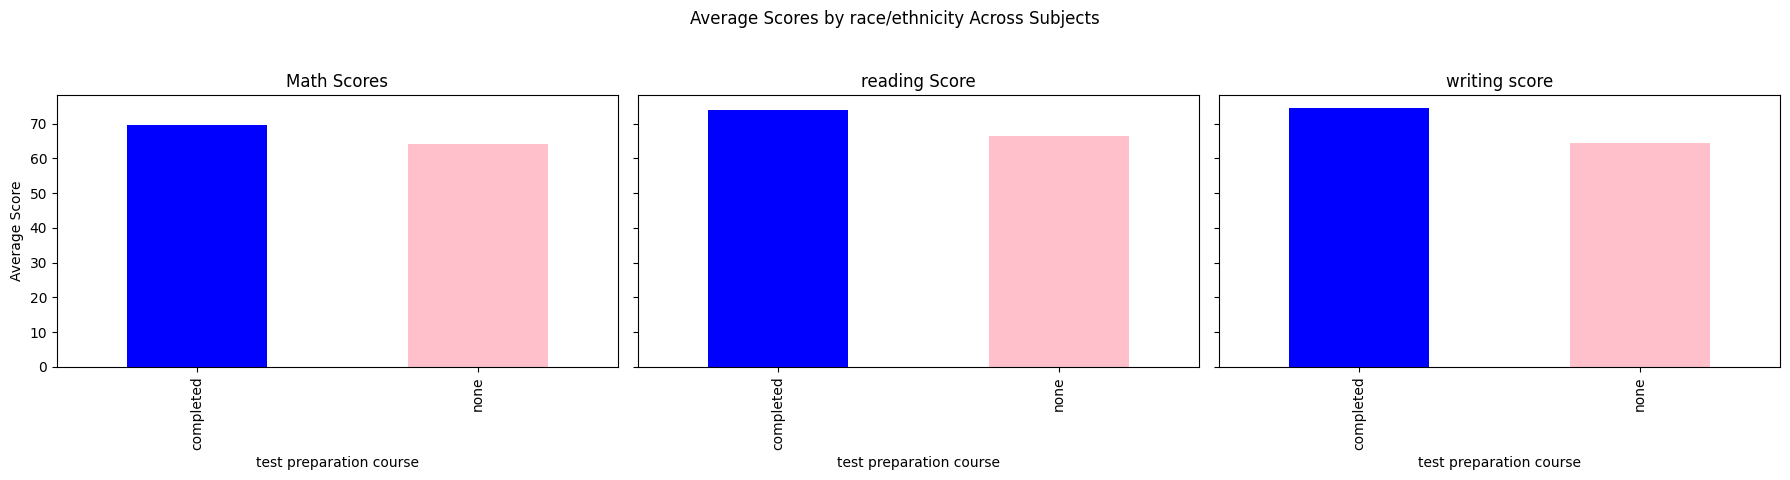

In [ ]:
#test preparation course
mean_scores = data.groupby('test preparation course')[numeric_cols].mean()
#math score                     0
#reading score                  0
#writing score
# Create bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # sharey allows sharing Y axis among subplots

# Plotting each score
mean_scores['math score'].plot(kind='bar', ax=axes[0], color=['blue', 'pink'])
axes[0].set_title('Math Scores')
axes[0].set_ylabel('Average Score')

mean_scores['reading score'].plot(kind='bar', ax=axes[1], color=['blue', 'pink'])
axes[1].set_title('reading Score')

mean_scores['writing score'].plot(kind='bar', ax=axes[2], color=['blue', 'pink'])
axes[2].set_title('writing score')

# Fine-tuning
plt.suptitle('Average Scores by test preparation course Across Subjects')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusts the plot to make room for the suptitle

# Show the plot
plt.show()


# Children who have completed test preparation course have edge over who have not done

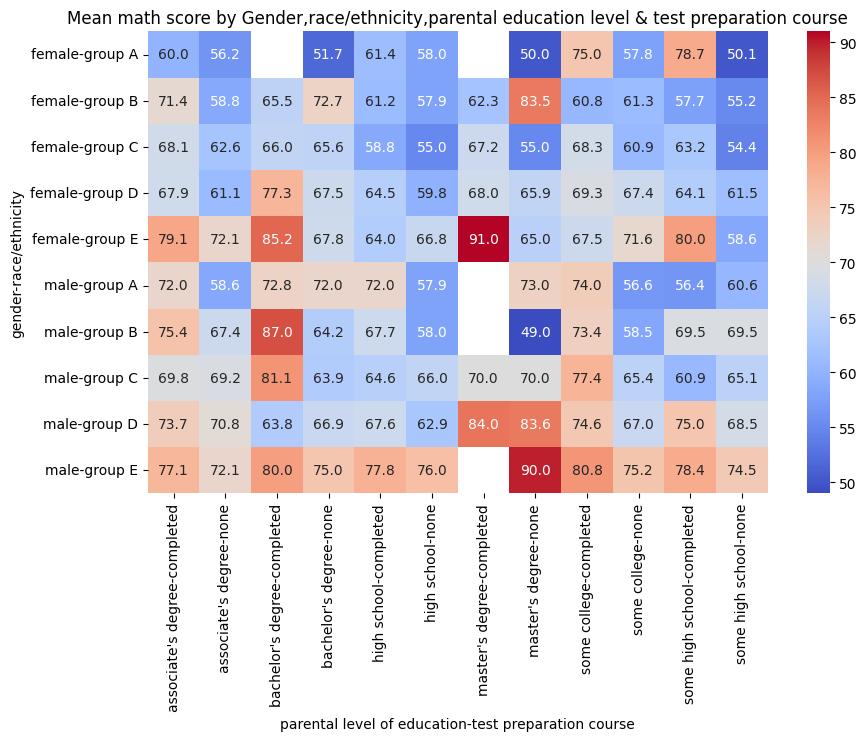

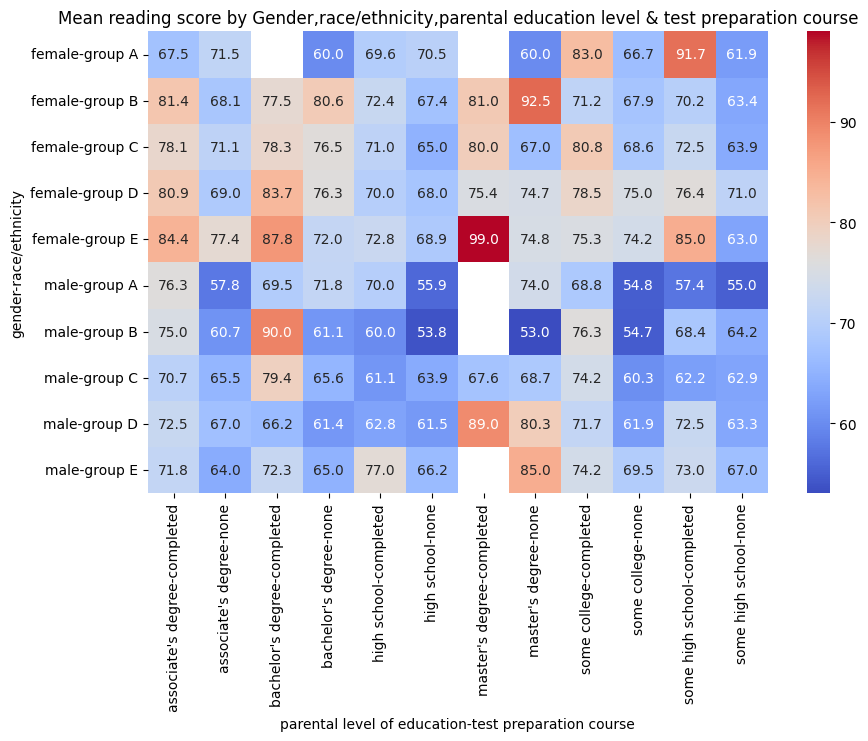

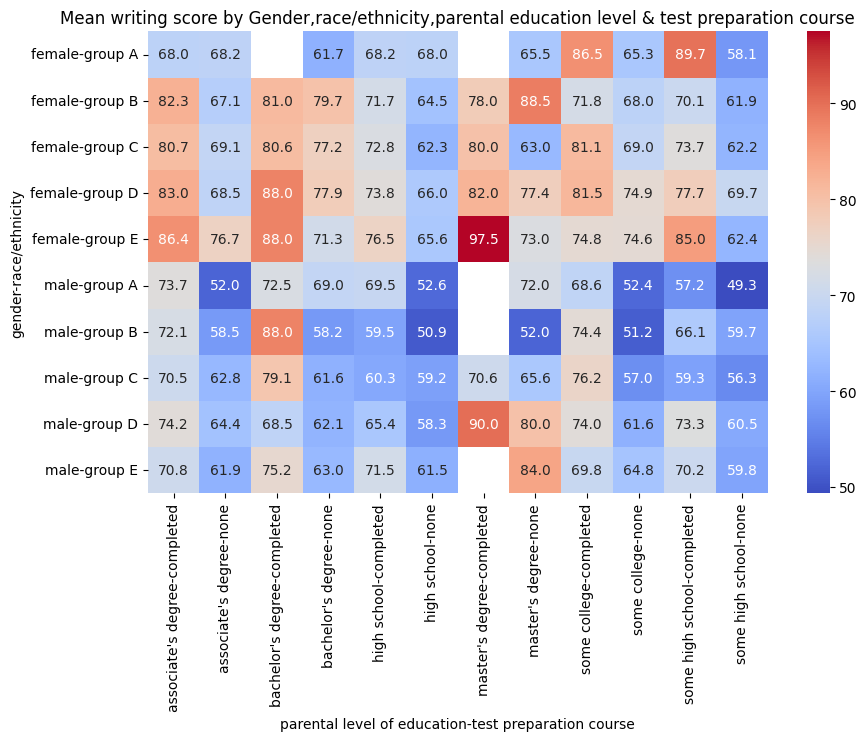

In [8]:
heatmap_data = data.pivot_table(index=["gender", "race/ethnicity"], columns=["parental level of education", "test preparation course"], values=numeric_cols, aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data["math score"], annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Mean math score by Gender,race/ethnicity,parental education level & test preparation course")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data["reading score"], annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Mean reading score by Gender,race/ethnicity,parental education level & test preparation course")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data["writing score"], annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Mean writing score by Gender,race/ethnicity,parental education level & test preparation course")
plt.show()


# From above heat map it can be inferred that female with group E ethicicity having parents with masterdegree and completed the test preparation course have fared the best amongst all



---
# 7. Employee Salary Prediction Dataset
**Objective: Understand salary determinants based on experience and qualifications.**
The dataset contains 375 entries with the following columns:

Age (numeric)

Gender (categorical: Male/Female)

Education Level (categorical: Bachelor's, Master's, PhD, etc.)

Job Title (categorical)

Years of Experience (numeric)

Salary (numeric)

Some rows have missing values (373 non-null instead of 375). I’ll clean the data and analyze how experience and qualifications influence salary. Let me process it







In [9]:
data = pd.read_csv('/content/drive/My Drive/kaggle/Salary Data.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [10]:
# Drop rows with missing values

data_clean = data.dropna()

# Summary statistics of numerical columns
summary_stats = data_clean[["Years of Experience", "Salary"]].describe()

# Check unique values in Education Level
education_levels = data_clean["Education Level"].unique()

summary_stats, education_levels


(       Years of Experience         Salary
 count           373.000000     373.000000
 mean             10.030831  100577.345845
 std               6.557007   48240.013482
 min               0.000000     350.000000
 25%               4.000000   55000.000000
 50%               9.000000   95000.000000
 75%              15.000000  140000.000000
 max              25.000000  250000.000000,
 array(["Bachelor's", "Master's", 'PhD'], dtype=object))

**Insights from the Data:**

The dataset includes 373 valid records after removing missing values.

The average years of experience is 10 years (ranging from 0 to 25 years).

The average salary is $100,577, with a wide range from $350 to $250,000.

Education Levels: The dataset contains Bachelor’s, Master’s, and PhD
qualifications.



Salary vs. Years of Experience (Does experience increase salary?)

Salary vs. Education Level (Does higher education lead to higher salaries?)

Combined Effect: How education & experience together impact salary.


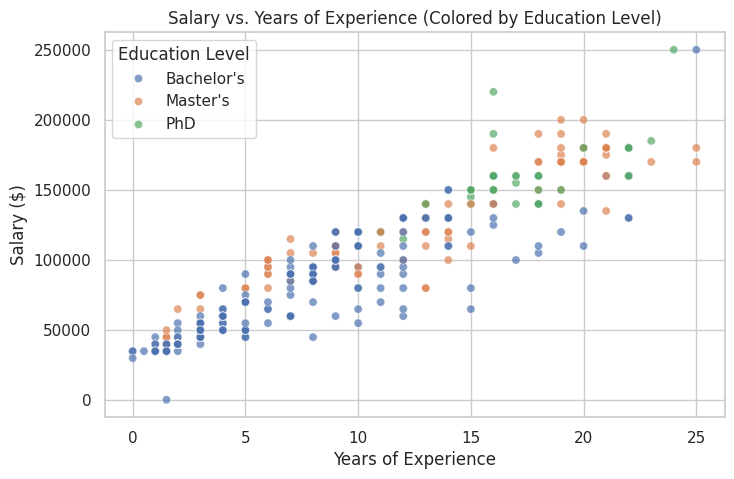

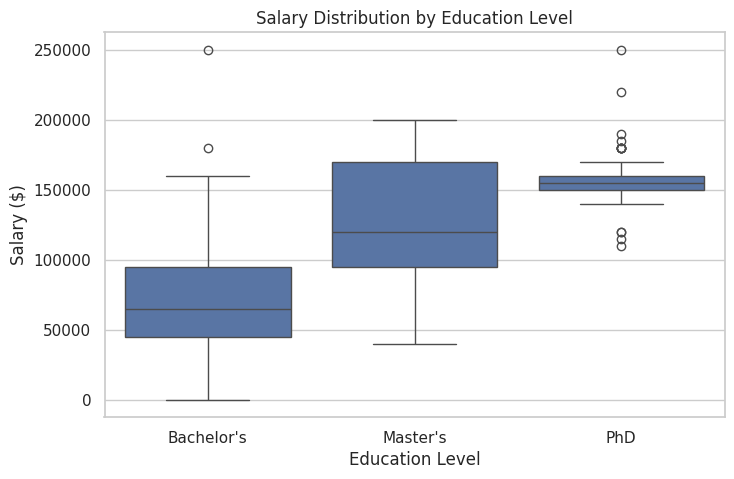

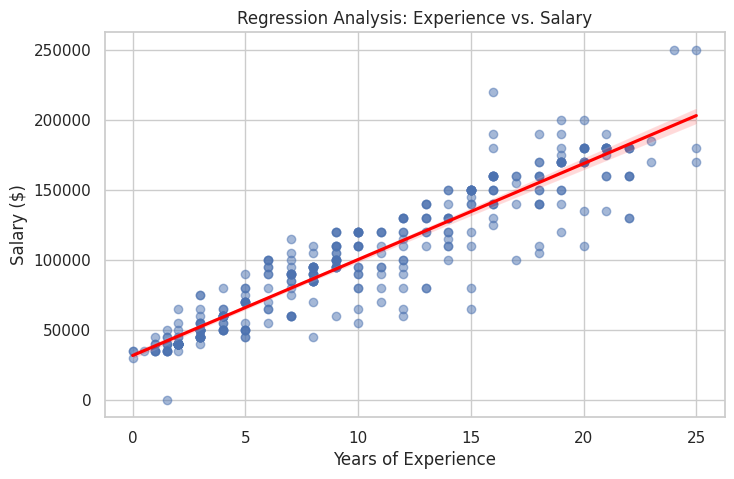

In [11]:
sns.set(style="whitegrid")

# 1. Salary vs. Years of Experience
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data_clean, x="Years of Experience", y="Salary", hue="Education Level", alpha=0.7)
plt.title("Salary vs. Years of Experience (Colored by Education Level)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.legend(title="Education Level")
plt.show()

# 2. Boxplot: Salary Distribution by Education Level
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_clean, x="Education Level", y="Salary")
plt.title("Salary Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary ($)")
plt.show()

# 3. Regression Plot: Experience & Salary Trend
plt.figure(figsize=(8, 5))
sns.regplot(data=data_clean, x="Years of Experience", y="Salary", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Regression Analysis: Experience vs. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.show()

**Findings from the Visualizations:**

Scatter Plot (Salary vs. Experience by Education Level)


Higher years of experience generally lead to higher salaries.

Those with PhDs tend to earn more at similar experience levels than Bachelor's or Master's holders.

Boxplot (Salary Distribution by Education Level)


PhD holders have the highest median salary, with less variability.

Master’s degree holders have a wider salary range, suggesting more variation in career paths.

Bachelor’s degree holders have a lower median salary but still show potential for high earnings.


Regression Plot (Experience vs. Salary Trendline)


The red trendline confirms a positive correlation between experience and salary.

The salary trend isn't strictly linear—suggesting factors like job title, industry, or negotiation skills might also play a role.


# 8. Energy Efficiency Dataset
**Objective: Analyze energy efficiency metrics in buildings.**

The dataset contains 768 records with 10 numerical columns labeled as X1–X8 (features) and Y1, Y2 (target variables).

Column Descriptions (Likely Meanings)

X1: Relative Compactness

X2: Surface Area

X3: Wall Area

X4: Roof Area

X5: Overall Height

X6: Orientation

X7: Glazing Area

X8: Glazing Area Distribution

Y1: Heating Load (kWh/m²) (Target)

Y2: Cooling Load (kWh/m²) (Target)



In [12]:
data = pd.read_csv('/content/drive/My Drive/kaggle/ENB2012_data.csv')

# Display basic information and the first few rows
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


(None,
      X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
 0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
 1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
 2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
 3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
 4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28)

In [14]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**1. Statistical Summary**

The average heating load (Y1) is 22.31 kWh/m², while the cooling load (Y2) is 24.59 kWh/m².

The mean relative compactness (X1) is 0.76, indicating moderate efficiency in building design.

Glazing area (X7) varies from 0% to 40%, which affects heat gain/loss.


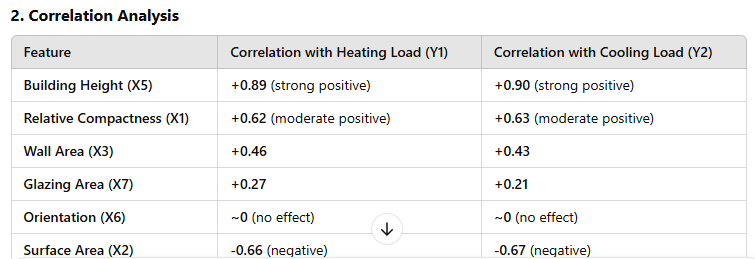

**Key Takeaways**

Building Height (X5) is the biggest driver of heating and cooling load.

Surface Area (X2) and Roof Area (X4) have negative correlations, meaning larger roofs and surfaces reduce energy demand (likely better insulation).

Orientation (X6) has almost no impact on energy efficiency in this dataset.


In [15]:
summary_stats_energy = data.describe()

# Compute correlation matrix
correlation_matrix = data.corr()

summary_stats_energy, correlation_matrix[["Y1", "Y2"]].sort_values(by="Y1", ascending=False)

(               X1          X2          X3          X4         X5          X6  \
 count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
 mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
 std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
 min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
 25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
 50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
 75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
 max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   
 
                X7         X8          Y1          Y2  
 count  768.000000  768.00000  768.000000  768.000000  
 mean     0.234375    2.81250   22.307201   24.587760  
 std      0.133221    1.55096   10.090196    9.513306  
 min      0.000000    0.00000    6.010000   1

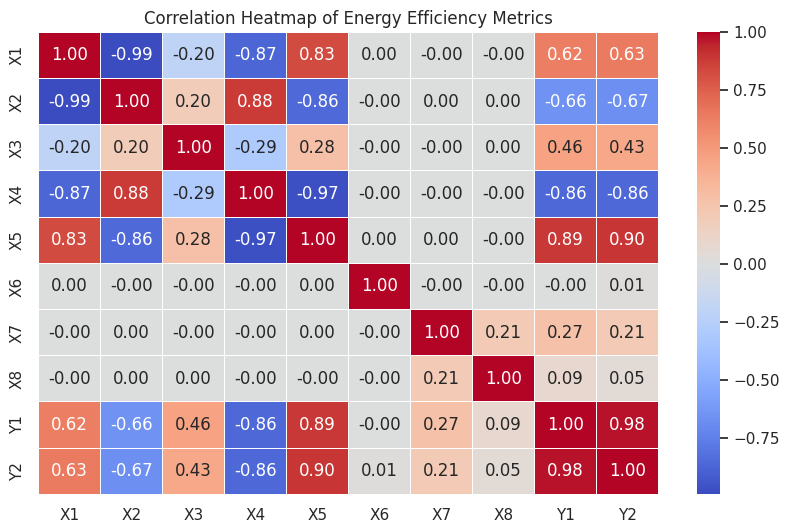

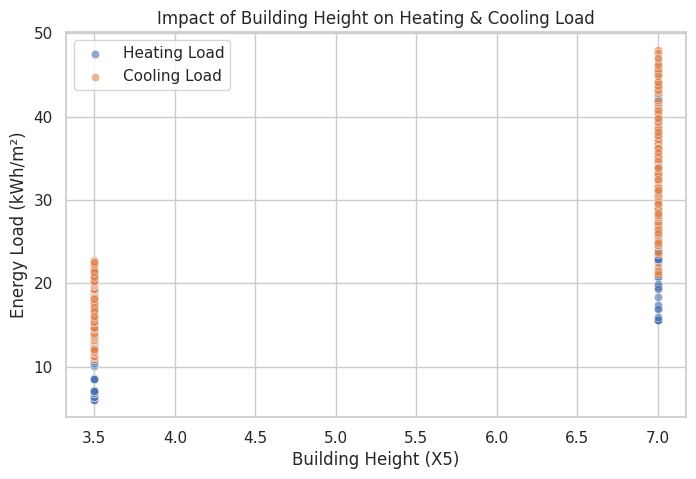

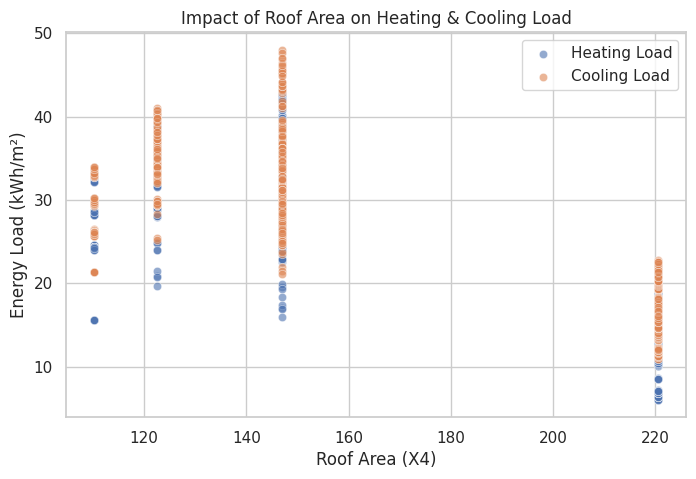

In [16]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Energy Efficiency Metrics")
plt.show()

# Scatter Plot: Building Height vs. Energy Load
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="X5", y="Y1", label="Heating Load", alpha=0.6)
sns.scatterplot(data=data, x="X5", y="Y2", label="Cooling Load", alpha=0.6)
plt.xlabel("Building Height (X5)")
plt.ylabel("Energy Load (kWh/m²)")
plt.title("Impact of Building Height on Heating & Cooling Load")
plt.legend()
plt.show()

# Scatter Plot: Roof Area vs. Energy Load
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="X4", y="Y1", label="Heating Load", alpha=0.6)
sns.scatterplot(data=data, x="X4", y="Y2", label="Cooling Load", alpha=0.6)
plt.xlabel("Roof Area (X4)")
plt.ylabel("Energy Load (kWh/m²)")
plt.title("Impact of Roof Area on Heating & Cooling Load")
plt.legend()
plt.show()

**Insights from Visualizations**
Correlation Heatmap


Confirms that building height (X5) and relative compactness (X1) strongly influence energy load.

Roof area (X4) and surface area (X2) have a negative impact, meaning larger areas may improve efficiency.

Building Height vs. Energy Load


Taller buildings consume more heating and cooling energy.
Roof Area vs. Energy Load


Larger roof areas reduce both heating and cooling loads, possibly due to better insulation.




---


# 9. Customer Churn Dataset
**Objective: Investigate customer attrition patterns based on service usage.**

**Dataset Overview**

The dataset contains 64,374 customer records with 12 features related to customer demographics, service usage, and attrition.


Key Features:

Demographics & Account Info


Age: Customer’s age.

Gender: Male/Female.

Tenure: Duration (in months) the customer has been with the service.
Service Usage & Payment Behavior


Usage Frequency: Number of service interactions per month.

Support Calls: Number of times the customer contacted support.

Payment Delay: Days of delayed payments.

Total Spend: Total amount spent by the customer.

Subscription Details


Subscription Type: Basic, Standard, Premium.

Contract Length: Monthly, Quarterly, Annual.

Last Interaction: Days since last service use.
Target Variable


Churn: 1 = Churned, 0 = Retained.


Exploratory Data Analysis (EDA)


Check churn distribution.

Compare churned vs. retained customers by tenure, service usage, and payment behavior.

Visualizations


Correlation heatmap.

Boxplots & bar charts for key variables.

Predictive Modeling


Build a churn prediction model using Logistic Regression or Machine Learning


In [19]:
churn_df = pd.read_csv('/content/drive/My Drive/kaggle/customer_churn_dataset.csv')

# Display basic information and first few rows
churn_df.info(), churn_df.head(),churn_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


(None,
    CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
 0           1   22  Female      25               14              4   
 1           2   41  Female      28               28              7   
 2           3   47    Male      27               10              2   
 3           4   35    Male       9               12              5   
 4           5   53  Female      58               24              9   
 
    Payment Delay Subscription Type Contract Length  Total Spend  \
 0             27             Basic         Monthly          598   
 1             13          Standard         Monthly          584   
 2             29           Premium          Annual          757   
 3             17           Premium       Quarterly          232   
 4              2          Standard          Annual          533   
 
    Last Interaction  Churn  
 0                 9      1  
 1                20      0  
 2                21      0  
 3                18      0  
 4   

<ipython-input-20-ed1f73e45079>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["blue", "red"])


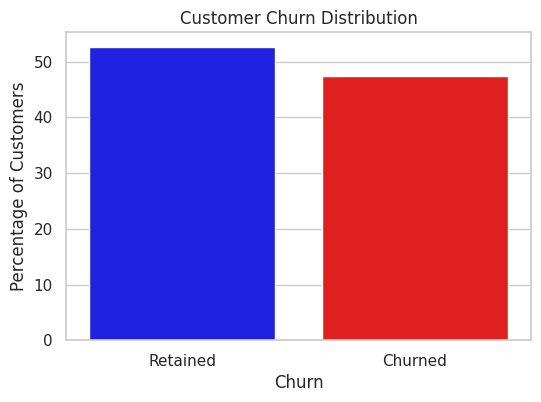

<ipython-input-20-ed1f73e45079>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=churn_df, x="Churn", y="Tenure", palette=["blue", "red"])


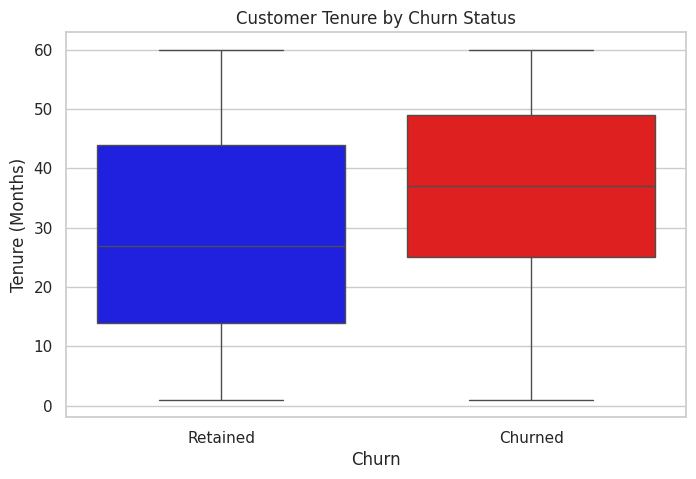

<ipython-input-20-ed1f73e45079>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=churn_df, x="Churn", y="Payment Delay", palette=["blue", "red"])


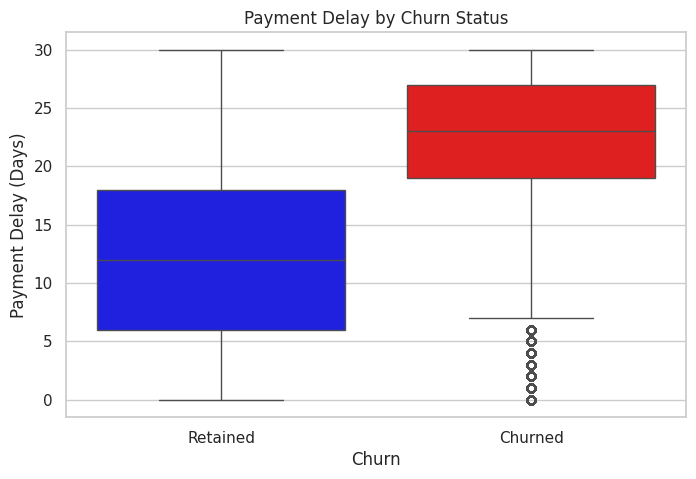

In [20]:
churn_counts = churn_df["Churn"].value_counts(normalize=True) * 100

# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["blue", "red"])
plt.xticks([0, 1], ["Retained", "Churned"])
plt.ylabel("Percentage of Customers")
plt.title("Customer Churn Distribution")
plt.show()

# Boxplot: Tenure vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=churn_df, x="Churn", y="Tenure", palette=["blue", "red"])
plt.xticks([0, 1], ["Retained", "Churned"])
plt.ylabel("Tenure (Months)")
plt.title("Customer Tenure by Churn Status")
plt.show()

# Boxplot: Payment Delay vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=churn_df, x="Churn", y="Payment Delay", palette=["blue", "red"])
plt.xticks([0, 1], ["Retained", "Churned"])
plt.ylabel("Payment Delay (Days)")
plt.title("Payment Delay by Churn Status")
plt.show()

**Key Insights from Churn Analysis**

Churn Rate


A significant portion of customers have churned (red bar), indicating a potential retention issue.

Tenure vs. Churn


Churned customers have shorter tenures on average, meaning new customers are more likely to leave.

Payment Delay vs. Churn


Churned customers tend to have higher payment delays, suggesting late payments may be an early warning sign of churn.

